## Observations

1. Urban fares have the largest percentage of total fares (62.7%) compared against other city types. 
2. Rural rides have the smallest percentage of total rides (5.3%) compared against other city types.
3. Surburban cities have the second highest percentage of total drivers (16.5%) compared against other city types. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(city_data,ride_data,on="city")
# Display the data table for preview
merged_data.sort_values("driver_count", ascending=True).head(5)

,city,driver_count,type,date,fare,ride_id
2035,South Brenda,1,Suburban,2018-02-18 06:29:58,41.32,9773072633339
2232,North Richardhaven,1,Suburban,2018-01-19 03:13:31,41.94,4578409710197
2233,North Richardhaven,1,Suburban,2018-02-07 00:21:48,12.58,1426750547562
2234,North Richardhaven,1,Suburban,2018-02-07 13:18:22,27.02,640776642679
2325,North Jaime,1,Rural,2018-03-06 09:09:23,44.17,1152195873170


## Bubble Plot of Ride Sharing Data

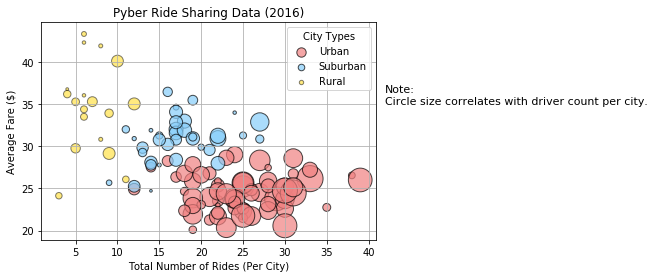

In [2]:
# Obtain the x and y coordinates for Urban cities
urban = merged_data.loc[merged_data['type'] == "Urban"]
urban_city = urban.groupby("city")
urban_rides = urban_city["ride_id"].count()
urban_fare = urban_city["fare"].mean()
urban_size = urban_city["driver_count"].sum()

#obtain x and y coordinates for suburban cities
suburban = merged_data.loc[merged_data['type'] == "Suburban"]
sub_city = suburban.groupby("city")
sub_rides = sub_city["ride_id"].count()
sub_fare = sub_city["fare"].mean()
sub_size = sub_city["driver_count"].sum()

#obtain x and y coordinates for rural cities
rural = merged_data.loc[merged_data["type"] == "Rural"]
rural_city = rural.groupby("city")
rural_rides = rural_city["ride_id"].count()
rural_fare = rural_city["fare"].mean()
rural_size = rural_city["driver_count"].sum()

# Build the scatter plots for each city types
Urban = plt.scatter(urban_rides,urban_fare,alpha=0.7,s=urban_size*.3,c="lightcoral",edgecolor='black',label="Urban")
Suburban = plt.scatter(sub_rides,sub_fare,alpha=0.7,s=sub_size*.5,c="lightskyblue",edgecolor='black',label="Suburban")
Rural = plt.scatter(rural_rides,rural_fare,alpha=0.5,s=rural_size*2,c="gold",edgecolor='black',label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
plt.rcParams["legend.markerscale"] = 0.5
legend = plt.legend(handles=[Urban,Suburban,Rural],title="City Types")

# Incorporate a text label regarding circle size
plt.text(42,35,'Note:\nCircle size correlates with driver count per city.',fontsize=11)

# Save Figure
plt.savefig("data/ride_sharing_data.png")

## Total Fares by City Type

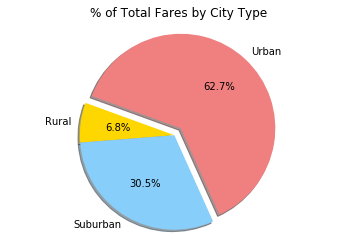

In [3]:
# Calculate Type Percents
type_grouped = merged_data.groupby("type")
total_fares = type_grouped["fare"].sum()

#establish colors, labels, and explode value for all charts
colors = ["gold","lightskyblue","lightcoral"]
labels = ["Rural","Suburban","Urban"]
explode=(0,0,.1)

# Build Pie Chart
plt.pie(total_fares,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("data/total_fares_by_city_type.png")

#Show Figure
plt.show()

## Total Rides by City Type

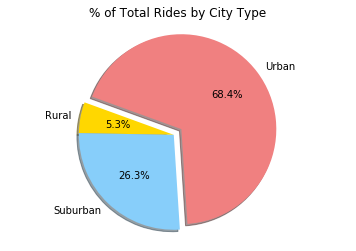

In [4]:
# Calculate Ride Percents
total_rides = type_grouped["ride_id"].count()

# Build Pie Chart
plt.pie(total_rides,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/total_rides_by_city_type.png")

#Show Figure
plt.show()

## Total Drivers by City Type

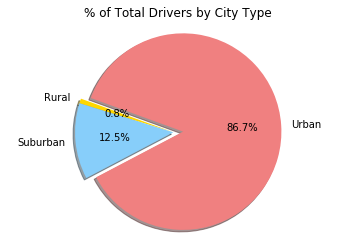

In [17]:
# Calculate Driver Percents
total_drivers = type_grouped["driver_count"].sum()

# Build Pie Charts
plt.pie(total_drivers,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("data/total_drivers_by_city_type.png")

# Show Figure
plt.show()